# WeatherPy
----

In [1]:
import pandas as pd
import json
import requests
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
# Define city list
city_list=[]

# Loop through random coordinates to generate city list
for city in range(2000):
    lat=random.randrange(-90,90)
    lng=random.randrange(-180,180)
    city = citipy.nearest_city(lat,lng)
    city_list.append(city.city_name)
# Check city list length
len(city_list)

2000

In [3]:
# Drop duplicate cities from city list
city_list = list(set(city_list))

# Check city list length with out duplicate cities
len(city_list)

735

In [4]:
# Define lists for city data
City=[]
Lat=[]
Lng=[]
Max_Temp=[]
Humidity=[]
Cloudiness=[]
Wind_Speed=[]
Country=[]
Date=[]

#data={"City":[City],"Lat":[Lat],"Lng":[Lng],"Max_Temp":[Max_Temp],"Humidity":[Humidity],"Cloudiness":[Cloudiness],"Wind_Speed":[Wind_Speed],"Country":[Country],"Date":[Date]}


In [5]:
# Set weather api url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define city to test weather api url
city="petaluma"   
    
query_url = url + "appid=" + weather_api_key + "&q=" + city
print(f"Getting data for {city}")
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

Getting data for petaluma


{'coord': {'lon': -122.64, 'lat': 38.23},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 285.67,
  'feels_like': 284.7,
  'temp_min': 284.26,
  'temp_max': 287.59,
  'pressure': 1015,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 1.61, 'deg': 281},
 'clouds': {'all': 75},
 'dt': 1601028206,
 'sys': {'type': 1,
  'id': 5152,
  'country': 'US',
  'sunrise': 1601042485,
  'sunset': 1601085753},
 'timezone': -25200,
 'id': 5382232,
 'name': 'Petaluma',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [6]:
# Define weather api url
url = "http://api.openweathermap.org/data/2.5/weather?"

# City counter 
x=1

# Store today's date 
today= datetime.date.today()
date=today.strftime("%m/%d/%Y")

# Loop through city_list to retrieve city data from weather api url
for city in city_list:    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "imperial"
    try:
        print(f"Getting data for city #{x}|{city}")
        
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        City.append(weather_json['name'])
        Lat.append(weather_json['coord']['lat'])
        Lng.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Humidity.append(weather_json['main']['humidity'])
        Cloudiness.append(weather_json['clouds']['all'])
        Wind_Speed.append(weather_json['wind']['speed'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
        x=x+1
    except:
        print("data not found")

Getting data for city #1|bowen
Getting data for city #2|bure
Getting data for city #3|urumqi
Getting data for city #4|terrasini
Getting data for city #5|clyde river
Getting data for city #6|ardistan
data not found
Getting data for city #6|valkeakoski
Getting data for city #7|tongzi
Getting data for city #8|coolum beach
Getting data for city #9|thoen
Getting data for city #10|natal
Getting data for city #11|khani
Getting data for city #12|san quintin
Getting data for city #13|paso de los toros
Getting data for city #14|korla
Getting data for city #15|taltal
Getting data for city #16|viligili
data not found
Getting data for city #16|winnemucca
Getting data for city #17|bloomfield
Getting data for city #18|kieta
Getting data for city #19|uporovo
Getting data for city #20|goderich
Getting data for city #21|ludvika
Getting data for city #22|klaksvik
Getting data for city #23|jiutai
Getting data for city #24|ljungby
Getting data for city #25|srandakan
Getting data for city #26|tessalit
Getti

Getting data for city #196|doctor arroyo
Getting data for city #197|iqaluit
Getting data for city #198|berdigestyakh
Getting data for city #199|rubiataba
Getting data for city #200|beipiao
Getting data for city #201|el balyana
data not found
Getting data for city #201|galesong
Getting data for city #202|pudozh
Getting data for city #203|turan
Getting data for city #204|kavaratti
Getting data for city #205|lasa
Getting data for city #206|chokurdakh
Getting data for city #207|churapcha
Getting data for city #208|sitka
Getting data for city #209|kapoeta
Getting data for city #210|kavali
Getting data for city #211|wanning
Getting data for city #212|mehndawal
Getting data for city #213|provideniya
Getting data for city #214|igurubi
Getting data for city #215|saskylakh
Getting data for city #216|albany
Getting data for city #217|basoko
Getting data for city #218|bredasdorp
Getting data for city #219|puerto leguizamo
Getting data for city #220|nha trang
Getting data for city #221|folldal
Gett

Getting data for city #398|yeppoon
Getting data for city #399|manicaragua
Getting data for city #400|chagda
data not found
Getting data for city #400|halalo
data not found
Getting data for city #400|agua verde
Getting data for city #401|wladyslawowo
Getting data for city #402|tsienyane
data not found
Getting data for city #402|prieska
Getting data for city #403|esperance
Getting data for city #404|mogok
Getting data for city #405|busselton
Getting data for city #406|airai
Getting data for city #407|new norfolk
Getting data for city #408|sargatskoye
Getting data for city #409|carupano
Getting data for city #410|heyang
Getting data for city #411|arivonimamo
Getting data for city #412|pevek
Getting data for city #413|talaya
Getting data for city #414|najran
Getting data for city #415|severo-kurilsk
Getting data for city #416|guerrero negro
Getting data for city #417|hithadhoo
Getting data for city #418|mabay
Getting data for city #419|guajara
Getting data for city #420|makat
Getting data 

Getting data for city #600|kargapolye
data not found
Getting data for city #600|wagar
Getting data for city #601|kuusamo
Getting data for city #602|kismayo
Getting data for city #603|sedelnikovo
data not found
Getting data for city #603|fuerte olimpo
Getting data for city #604|magistralnyy
Getting data for city #605|ergani
Getting data for city #606|north myrtle beach
Getting data for city #607|dalvik
Getting data for city #608|anadyr
Getting data for city #609|ayorou
Getting data for city #610|bathsheba
Getting data for city #611|raipur
Getting data for city #612|hilo
Getting data for city #613|jamestown
Getting data for city #614|sept-iles
Getting data for city #615|dongobesh
Getting data for city #616|willowmore
Getting data for city #617|usinsk
Getting data for city #618|nicoya
Getting data for city #619|shenzhen
Getting data for city #620|diffa
Getting data for city #621|celestun
Getting data for city #622|whitehorse
Getting data for city #623|nova olinda do norte
Getting data for

In [7]:
# Create dataframe from city data
data={"City":City,"Lat":Lat,"Lng":Lng,"Max_Temp":Max_Temp,"Humidity":Humidity,"Cloudiness":Cloudiness,"Wind_Speed":Wind_Speed,"Country":Country,"Date":Date}
data_df=pd.DataFrame(data, columns=['City','Lat','Lng','Max_Temp','Humidity','Cloudiness','Wind_Speed','Country','Date'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Export city data into .csv file
data_df.to_csv (r'..\output_data\cities_data.csv', index = False, header=True)

# Display dataframe
data_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Bowen,-20.02,148.23,73.40,73,40,5.82,AU,1601028206
1,Burē,10.70,37.07,70.83,69,47,3.38,ET,1601028206
2,Ürümqi,43.80,87.60,60.80,40,17,13.42,CN,1601028207
3,Terrasini,38.15,13.08,88.00,48,29,23.04,IT,1601028207
4,Clyde River,70.47,-68.59,28.53,96,100,7.36,CA,1601028207
...,...,...,...,...,...,...,...,...,...
664,Grandview,38.89,-94.53,63.00,77,1,8.05,US,1601028393
665,Monte Alegre,-2.01,-54.07,75.16,84,17,7.70,BR,1601028393
666,Cleveland,41.50,-81.70,62.60,72,1,6.93,US,1601028143
667,Port Macquarie,-31.43,152.92,71.01,33,0,1.01,AU,1601028394


## Inspect the data and remove the cities where the humidity > 100%.
----

In [9]:
# Drop city with humidity over 100%
data_clean=data_df.drop( data_df[ data_df['Humidity'] > 100 ].index , inplace=False)

# Display clean dataframe
data_clean

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Bowen,-20.02,148.23,73.40,73,40,5.82,AU,1601028206
1,Burē,10.70,37.07,70.83,69,47,3.38,ET,1601028206
2,Ürümqi,43.80,87.60,60.80,40,17,13.42,CN,1601028207
3,Terrasini,38.15,13.08,88.00,48,29,23.04,IT,1601028207
4,Clyde River,70.47,-68.59,28.53,96,100,7.36,CA,1601028207
...,...,...,...,...,...,...,...,...,...
664,Grandview,38.89,-94.53,63.00,77,1,8.05,US,1601028393
665,Monte Alegre,-2.01,-54.07,75.16,84,17,7.70,BR,1601028393
666,Cleveland,41.50,-81.70,62.60,72,1,6.93,US,1601028143
667,Port Macquarie,-31.43,152.92,71.01,33,0,1.01,AU,1601028394


## Plot the Data


## Latitude vs. Temperature Plot

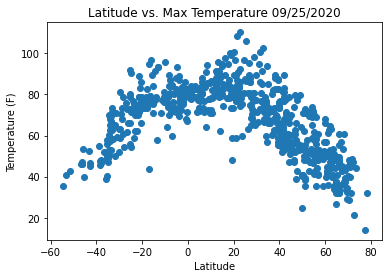

In [10]:
# Generate scatter plot
plt.scatter(data_clean["Lat"], data_clean["Max_Temp"])
plt.title(f"Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig('lat_v_temp.png')
plt.show()

## Latitude vs. Humidity Plot

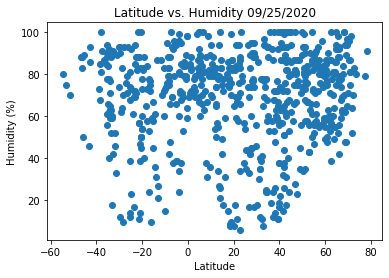

In [11]:
# Generate scatter plot
plt.scatter(data_clean["Lat"], data_clean["Humidity"])
plt.title(f"Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('lat_v_humid.png')
plt.show()

## Latitude vs. Cloudiness Plot

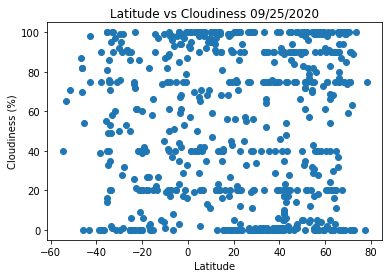

In [12]:
# Generate scatter plot
plt.scatter(data_clean["Lat"], data_clean["Cloudiness"])
plt.title(f"Latitude vs Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('lat_v_cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

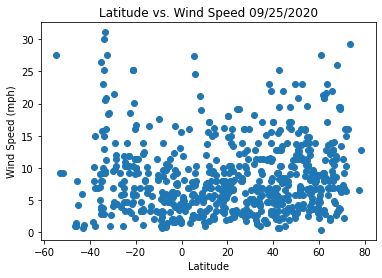

In [13]:
# Generate scatter plot
plt.scatter(data_clean["Lat"], data_clean["Wind_Speed"])
plt.title(f"Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('lat_v_wind.png')
plt.show()

## Linear Regression

In [14]:
# Create separate data frames for the northern and southern hemispheres
north_df=data_df.drop(data_df[data_df['Lat']<0].index,inplace=False)
south_df=data_df.drop(data_df[data_df['Lat']>0].index,inplace=False)
print(f"{len(north_df)} cities in our sample list are in the northern hemisphere")
print(f"{len(south_df)} cities in our sample list are in the southern hemisphere")

474 cities in our sample list are in the northern hemisphere
195 cities in our sample list are in the southern hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

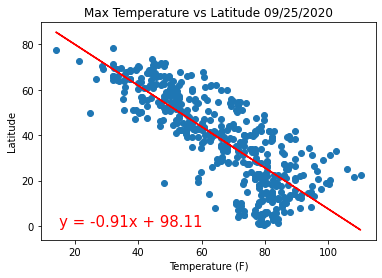

In [15]:
# Generate scatter plot
plt.scatter(north_df["Max_Temp"], north_df["Lat"])
plt.title(f"Max Temperature vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Max_Temp"], north_df["Lat"])
regress_values = north_df["Max_Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(north_df["Max_Temp"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Max_Temp"],regress_values,"r-")
plt.annotate(line_eq,(15,0),fontsize=15,color="red")
plt.savefig('temp_v_lat_north.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

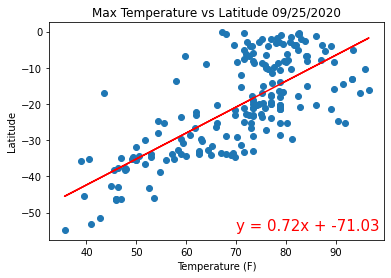

In [16]:
# Generate scatter plot
plt.scatter(south_df["Max_Temp"], south_df["Lat"])
plt.title(f"Max Temperature vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Max_Temp"], south_df["Lat"])
regress_values = south_df["Max_Temp"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(south_df["Max_Temp"], south_df["Lat"])

# Plot regression
plt.plot(south_df["Max_Temp"],regress_values,"r-")
plt.annotate(line_eq,(70,-55),fontsize=15,color="red")
plt.savefig('temp_v_lat_south.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

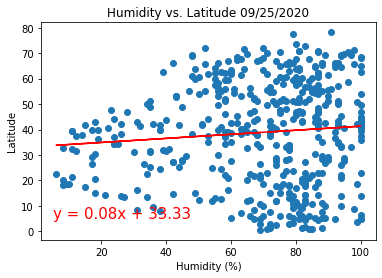

In [17]:
# Generate scatter plot
plt.scatter(north_df["Humidity"], north_df["Lat"])
plt.title(f"Humidity vs. Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Humidity"], north_df["Lat"])
regress_values = north_df["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(north_df["Humidity"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")

plt.savefig('humdity_v_lat_north.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

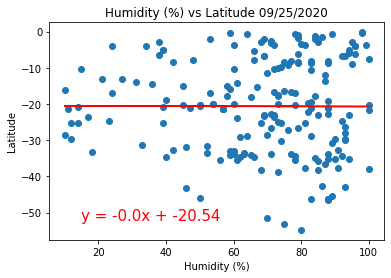

In [18]:
# Generate scatter plot
plt.scatter(south_df["Humidity"], south_df["Lat"])
plt.title(f"Humidity (%) vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Humidity"], south_df["Lat"])
regress_values = south_df["Humidity"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(south_df["Humidity"],south_df["Lat"])

# Plot regression
plt.plot(south_df["Humidity"],regress_values,"r-")
plt.annotate(line_eq,(15, -52),fontsize=15,color="red")
plt.savefig('humdity_v_lat_south.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

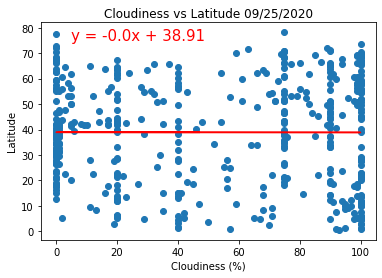

In [19]:
# Generate scatter plot
plt.scatter(north_df["Cloudiness"], north_df["Lat"])
plt.title(f"Cloudiness vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Cloudiness"], north_df["Lat"])
regress_values = north_df["Cloudiness"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(north_df["Cloudiness"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Cloudiness"],regress_values,"r-")
plt.annotate(line_eq,(5, 75),fontsize=15,color="red")
plt.savefig('cloud_v_lat_north.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

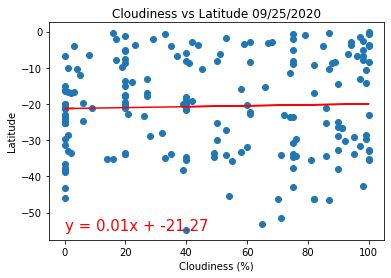

In [20]:
# Generate scatter plot
plt.scatter(south_df["Cloudiness"], south_df["Lat"])
plt.title(f"Cloudiness vs Latitude {date}")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Cloudiness"], south_df["Lat"])
regress_values = south_df["Cloudiness"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's correlation coefficient
correlation = st.pearsonr(south_df["Cloudiness"],south_df["Lat"])

# Plot regression
plt.plot(south_df["Cloudiness"],regress_values,"r-")
plt.annotate(line_eq,(0, -55),fontsize=15,color="red")
plt.savefig('cloud_v_lat_south.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

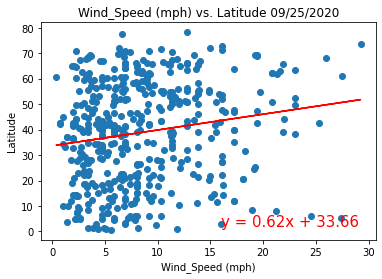

In [22]:
# Generate scatter plot
plt.scatter(north_df["Wind_Speed"], north_df["Lat"])
plt.title(f"Wind_Speed (mph) vs. Latitude {date}")
plt.xlabel("Wind_Speed (mph)")
plt.ylabel("Latitude")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df["Wind_Speed"], north_df["Lat"])
regress_values = north_df["Wind_Speed"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's coefficient
correWind_Speedion = st.pearsonr(north_df["Wind_Speed"],north_df["Lat"])

# Plot regression
plt.plot(north_df["Wind_Speed"],regress_values,"r-")
plt.annotate(line_eq,(16,2),fontsize=15,color="red")
plt.savefig('wind_v_lat_north.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

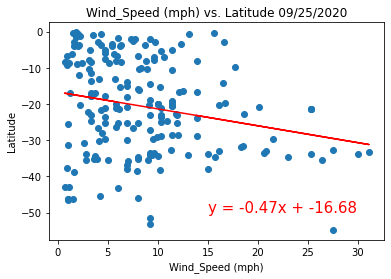

In [23]:
# Generate scatter plot
plt.scatter(south_df["Wind_Speed"], south_df["Lat"])
plt.title(f"Wind_Speed (mph) vs. Latitude {date}")
plt.xlabel("Wind_Speed (mph)")
plt.ylabel("Latitude")

# Calculate regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df["Wind_Speed"], south_df["Lat"])
regress_values = south_df["Wind_Speed"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Calculate Pearson's coefficient
correWind_Speedion = st.pearsonr(south_df["Wind_Speed"],south_df["Lat"])

# Plot regression
plt.plot(south_df["Wind_Speed"],regress_values,"r-")
plt.annotate(line_eq,(15, -50),fontsize=15,color="red")
plt.savefig('humdity_v_lat_south.png')
plt.show()